# PCA in Scikit Learn
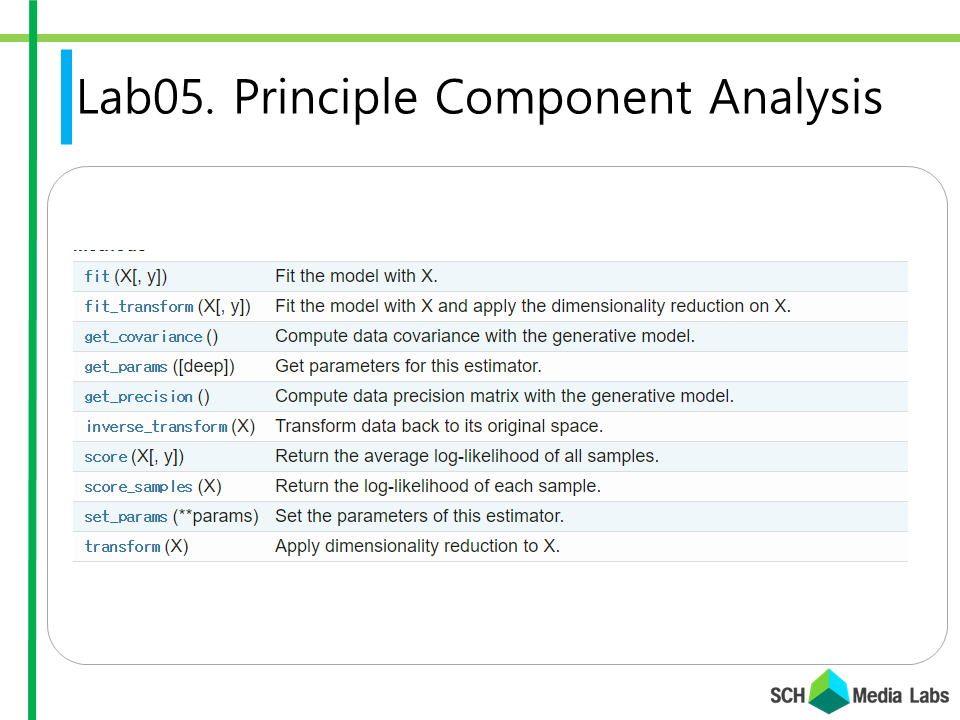
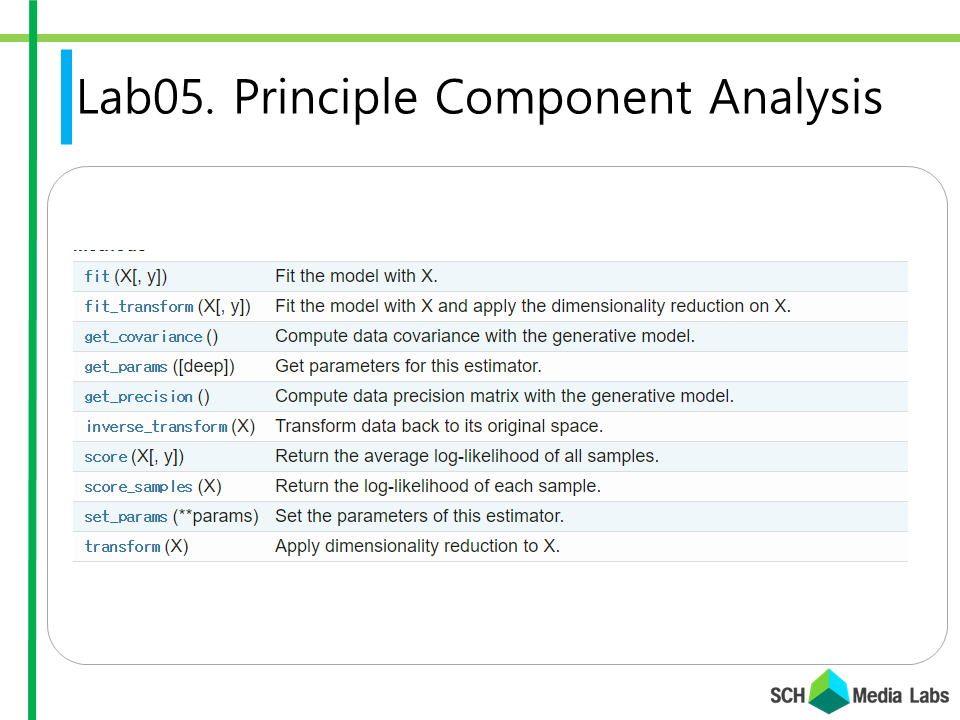

In [9]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[0.99244289 0.00755711]
[6.30061232 0.54980396]


[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


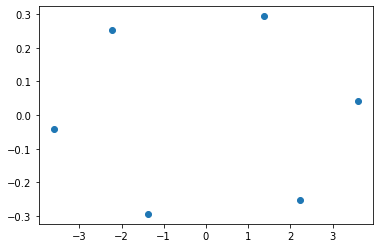

In [13]:
import matplotlib.pyplot as plt
X_trans = pca.transform(X)
print(X_trans)
plt.scatter(X_trans[:,0],X_trans[:,1])

In [ ]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)                 
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

In [54]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)#데이터 분할

pca = PCA(n_components=4)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

pca_pick = PCA(n_components=2)
pca_pick.fit(X_train)
X_trans = pca_pick.transform(X_train)

reg = LinearRegression(fit_intercept = True) #모델정의
reg2 = LinearRegression(fit_intercept = True) 
reg.fit(X_trans,y_train) #학습
reg2.fit(X_train,y_train) #학습
X_trans_test = pca_pick.transform(X_test)
pred = np.around(reg.predict(X_trans_test)) #예측값을 반올림(선형회귀라서 소수점으로 나옴)
pred2 = np.around(reg2.predict(X_test))
acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None) #정확도 계산
acc2 = accuracy_score(y_test, pred2, normalize=True, sample_weight=None) #정확도 계산
print(acc,acc2)

[0.92516526 0.05139229 0.01774763 0.00569482]
0.9333333333333333 0.9


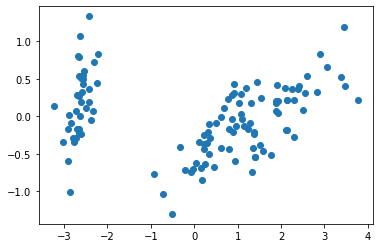

In [55]:
plt.scatter(X_trans[:,0],X_trans[:,1])

## IRIS Data set with PCA

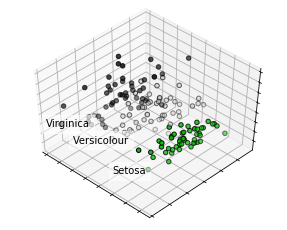

[0.92461872 0.05306648 0.01710261]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

print(pca.explained_variance_ratio_)  

## clustering with IRIS Data set with PCA